# Libraries to include

In [141]:
%run functions_new.ipynb

# Load the files 

Text(0.5, 1.0, 'Histogram of labels after processing participant: 0')

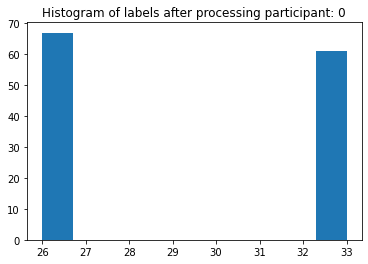

In [142]:

label = []
feature_matrix = []
n_participants = 15


for par_num in range (1,n_participants+1):

    x = fileload ('python_SSA_PSS_FS_P' + str(par_num) + '.mat',1)
    feats = fileload('feat_names.mat',5)
    feature_matrix1 = np.vstack ((x))
    
    # Creating the label matrix
    X = feature_matrix1 [:,0:-1]
    Y = feature_matrix1 [:,-1]

    # Pre post labels
    label1 = Y 

    # New feature matrix
    feature_matrix1 = X
    
    # Combining all of the features
    label.append (label1)
    feature_matrix.append(feature_matrix1)

# Histogram of Y
par_num = 0
plt.figure()
plt.hist(label[par_num])
plt.title ("Histogram of labels after processing participant: %d" %par_num)



# FT matrix set-up

In [143]:
n_samples_per_par1 = [0]*n_participants

for i in range (0,n_participants):
    print ("FT matrix of P:%d "%(i+1), feature_matrix[i].shape)
    n_samples_per_par1[i] = int (feature_matrix[i].shape[0])
n_samples_per_par = np.cumsum (n_samples_per_par1)
n_samples_per_par = np.insert (n_samples_per_par,0,0)

print ('Array of subject indicies:', n_samples_per_par)

FT matrix of P:1  (128, 21)
FT matrix of P:2  (147, 21)
FT matrix of P:3  (114, 21)
FT matrix of P:4  (174, 21)
FT matrix of P:5  (150, 21)
FT matrix of P:6  (147, 21)
FT matrix of P:7  (159, 21)
FT matrix of P:8  (154, 21)
FT matrix of P:9  (110, 21)
FT matrix of P:10  (150, 21)
FT matrix of P:11  (169, 21)
FT matrix of P:12  (122, 21)
FT matrix of P:13  (155, 21)
FT matrix of P:14  (133, 21)
FT matrix of P:15  (132, 21)
Array of subject indicies: [   0  128  275  389  563  713  860 1019 1173 1283 1433 1602 1724 1879
 2012 2144]


# Setting up feature matrix

In [144]:
# Stack the feature matrix to call 

hold1 = np.vstack ((feature_matrix))

n_row = hold1.shape[0]
n_col = hold1.shape[1]

ft_stacked = np.zeros ((n_row,n_col+1))

# Feature matrix in X

ft_stacked [:,0:n_col] = hold1
X = ft_stacked [:,0:-1]

## Clustering of labels
1. Binary of above and below cutoff value
2. Cut-off of 0-10, 10-20, 20-30
3. k means unsupervised clustering to create labels

In [145]:
from matplotlib.pyplot import figure

Text(0.5, 0, 'PSS-10 Score')

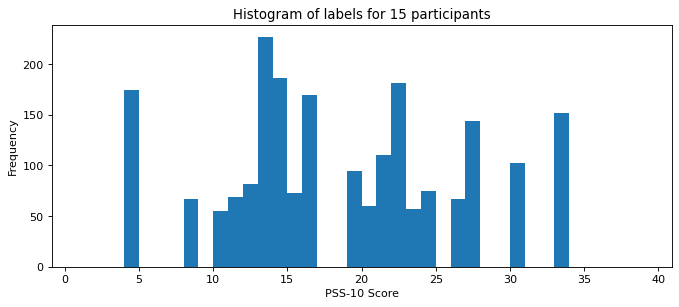

In [146]:
# Histogram presentation

data = np.concatenate(label).ravel()

figure(figsize=(10, 4), dpi=80)
plt.hist(data, bins=np.arange(1,40))
plt.title ("Histogram of labels for %d participants" %n_participants)
plt.ylabel ('Frequency')
plt.xlabel ('PSS-10 Score')


Length of Cluster 1: 674 Cluster 2: 1072 Cluster 3: 398


Text(0, 0.5, 'PSS score')

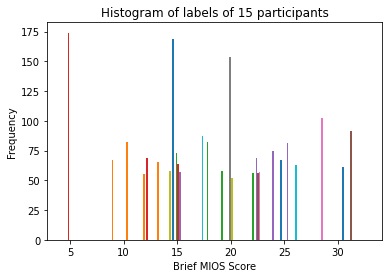

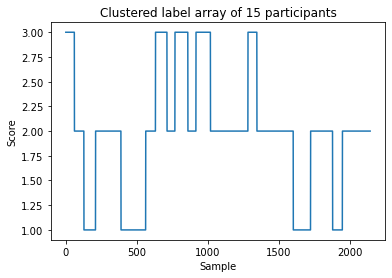

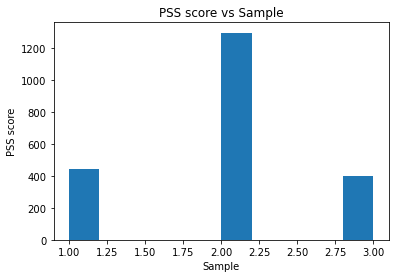

In [147]:
cutoff_clusters = [13,26]
hold2 = cluster_arbitrary_3 (label, n_participants, cutoff_clusters)
    
# Label matrix in Y
ft_stacked [:,-1] = hold2
Y = ft_stacked [:,-1]

# Plotting actual label vs samples
plt.figure ()
plt.hist (Y)
plt.title ('PSS score vs Sample')
plt.xlabel ('Sample')
plt.ylabel ('PSS score')

Length of Cluster 1: 447 Cluster 2: 1299 Cluster 3: 398


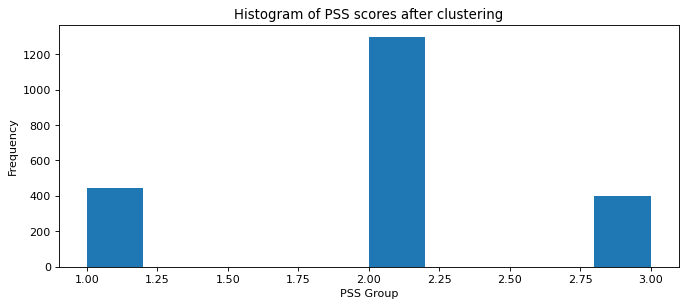

In [148]:
figure(figsize=(10, 4), dpi=80)
plt.hist (Y)
plt.title ('Histogram of PSS scores after clustering')
plt.xlabel ('PSS Group')
plt.ylabel ('Frequency')

print ('Length of Cluster 1: %d Cluster 2: %d Cluster 3: %d' %(sum(Y==1),sum(Y==2),sum(Y==3)))

Text(0, 0.5, 'Frequency')

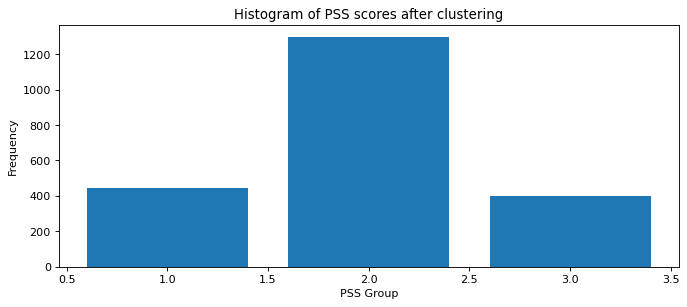

In [149]:
figure(figsize=(10, 4), dpi=80)
labels, counts = np.unique(Y, return_counts=True)
plt.bar(labels, counts, align='center')
plt.title ('Histogram of PSS scores after clustering')
plt.xlabel ('PSS Group')
plt.ylabel ('Frequency')

# Validation of SSA through analysis of one user
- See function for more detail

In [150]:
# validation (n_samples_per_par, X, Y,ft_stacked)

# Classification of all

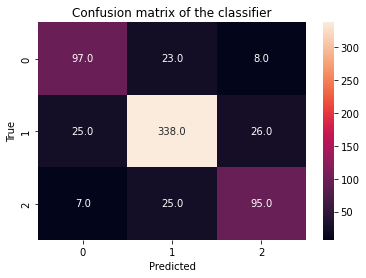

The accuracy of DT is 82.298137%
Precision/Recall/F1/Support:
(0.7880065871390127, 0.7915795325351361, 0.7897697925819003, None)
Participant: 0 
Total samples available: 2144            
Number of training samples: 1500 
Number of testing samples: 644 



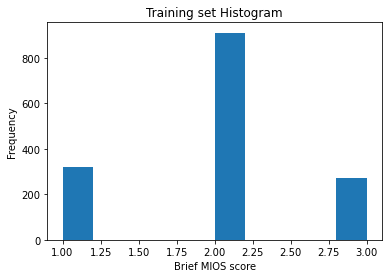

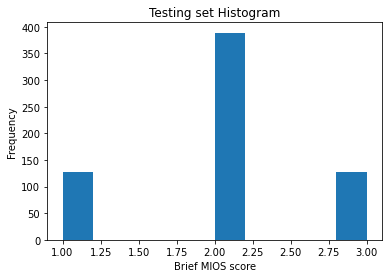

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

DT_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

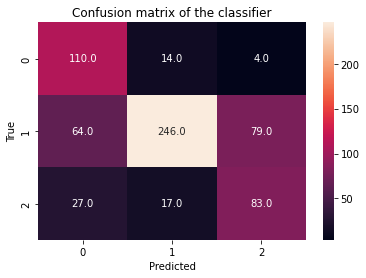

The accuracy of SVM is 68.167702%
Precision/Recall/F1/Support:
(0.6451167747304393, 0.7151030175292998, 0.6579948829603902, None)
Participant: 0 
Total samples available: 2144            
Number of training samples: 1500 
Number of testing samples: 644 



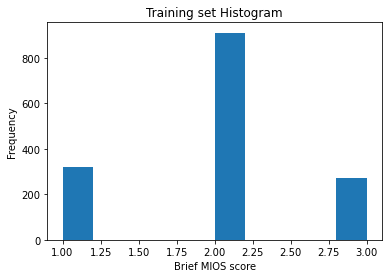

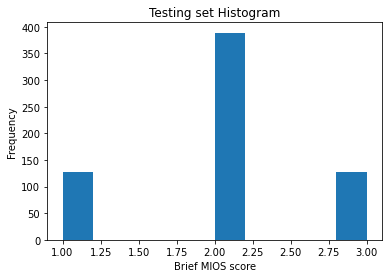

In [152]:
SVM_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

# Cross validation - LOSO

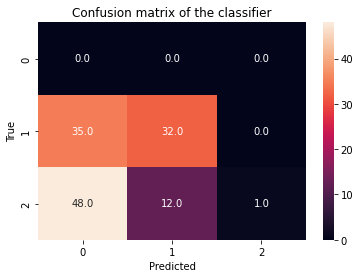

The accuracy of DT is 25.781250%
Precision/Recall/F1/Support:
(0.5757575757575758, 0.16466846097381943, 0.2029448803642352, None)
Participant: 1 
Total samples available: 2144            
Number of training samples: 2015 
Number of testing samples: 128 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


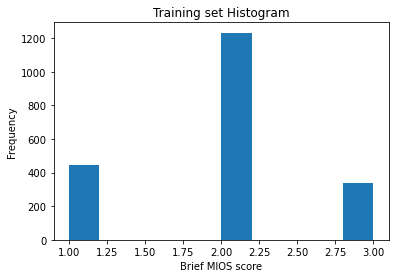

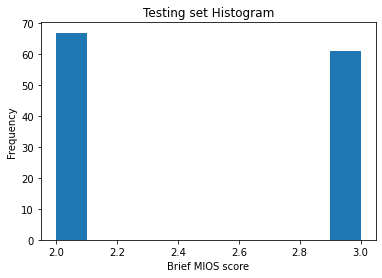

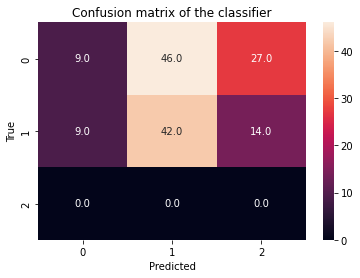

The accuracy of DT is 34.693878%
Precision/Recall/F1/Support:
(0.32575757575757575, 0.2519699812382739, 0.2430065359477124, None)
Participant: 2 
Total samples available: 2144            
Number of training samples: 1996 
Number of testing samples: 147 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


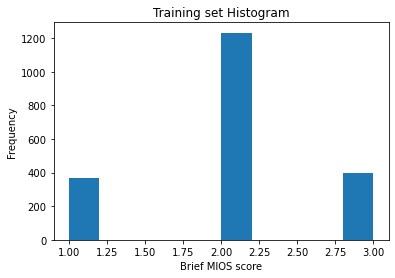

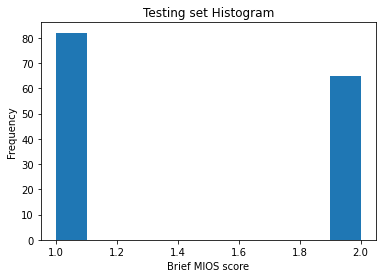

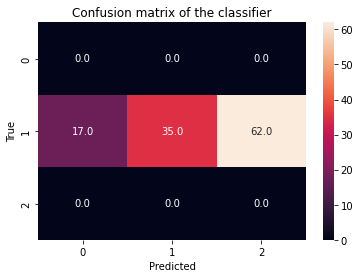

The accuracy of DT is 30.701754%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.10233918128654972, 0.15659955257270694, None)
Participant: 3 
Total samples available: 2144            
Number of training samples: 2029 
Number of testing samples: 114 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


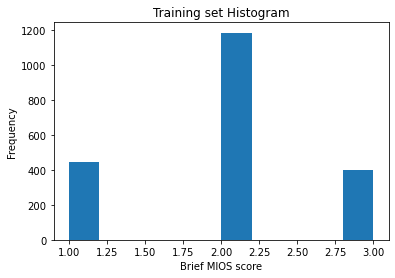

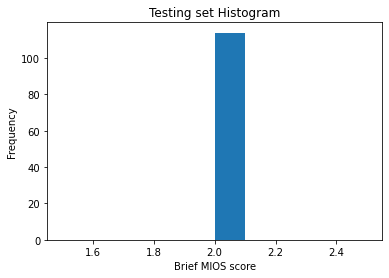

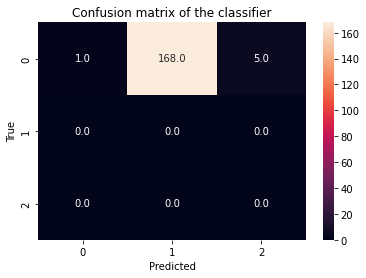

The accuracy of DT is 0.574713%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.0019157088122605363, 0.0038095238095238095, None)
Participant: 4 
Total samples available: 2144            
Number of training samples: 1969 
Number of testing samples: 174 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


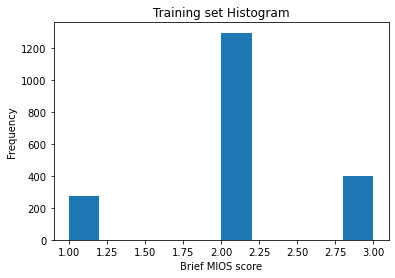

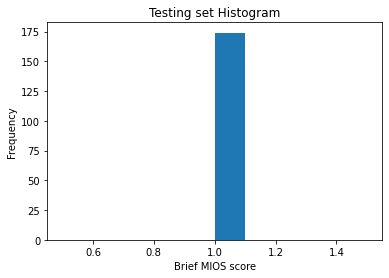

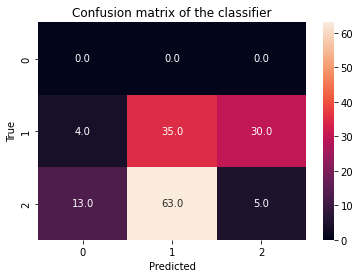

The accuracy of DT is 26.666667%
Precision/Recall/F1/Support:
(0.16666666666666666, 0.18965825729110755, 0.1684561910661436, None)
Participant: 5 
Total samples available: 2144            
Number of training samples: 1993 
Number of testing samples: 150 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


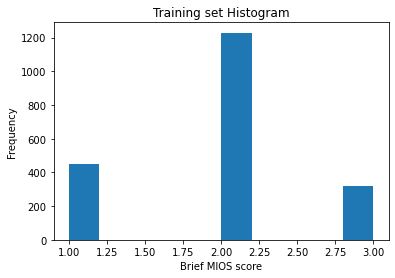

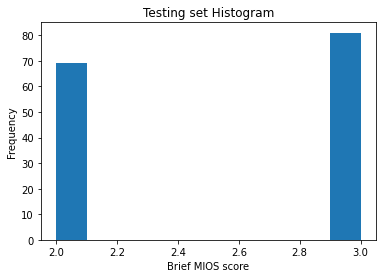

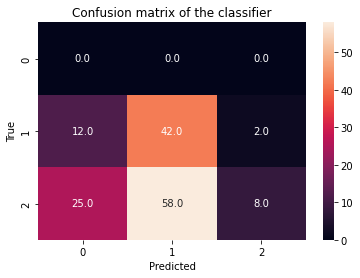

The accuracy of DT is 34.013605%
Precision/Recall/F1/Support:
(0.4066666666666667, 0.2793040293040293, 0.23229246001523232, None)
Participant: 6 
Total samples available: 2144            
Number of training samples: 1996 
Number of testing samples: 147 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


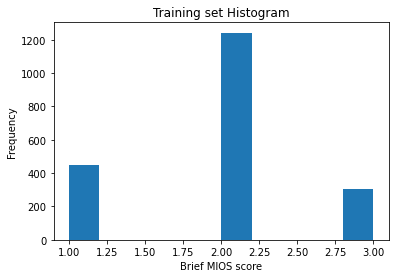

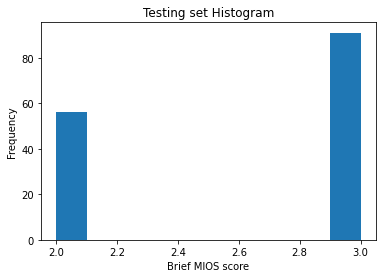

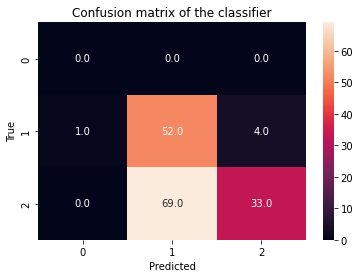

The accuracy of DT is 53.459119%
Precision/Recall/F1/Support:
(0.4405479860025315, 0.41193670450636394, 0.35302993560208007, None)
Participant: 7 
Total samples available: 2144            
Number of training samples: 1984 
Number of testing samples: 159 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


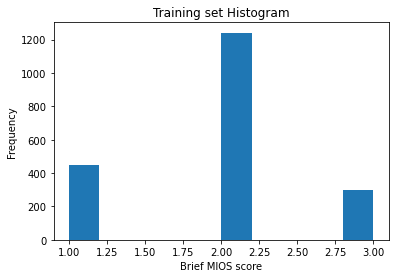

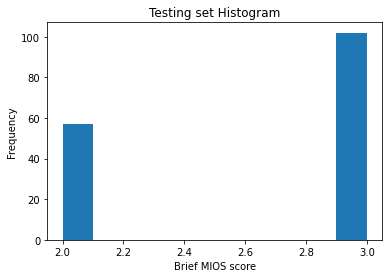

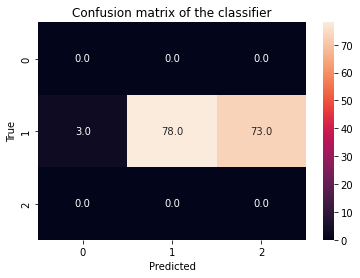

The accuracy of DT is 50.649351%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.1688311688311688, 0.22413793103448273, None)
Participant: 8 
Total samples available: 2144            
Number of training samples: 1989 
Number of testing samples: 154 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


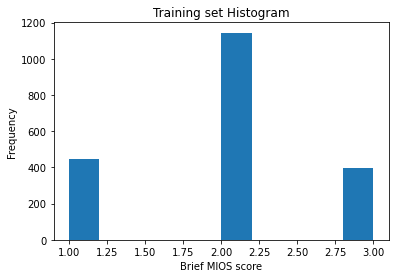

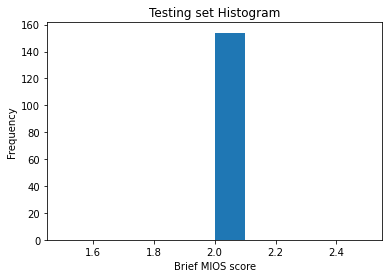

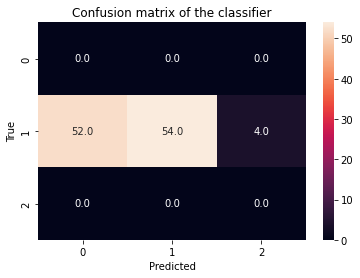

The accuracy of DT is 49.090909%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.16363636363636364, 0.2195121951219512, None)
Participant: 9 
Total samples available: 2144            
Number of training samples: 2033 
Number of testing samples: 110 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


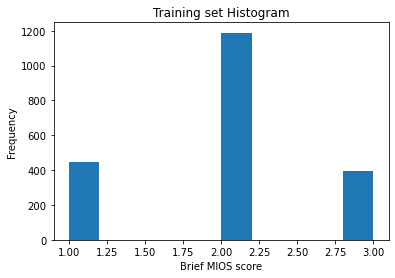

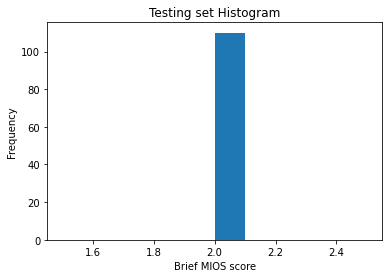

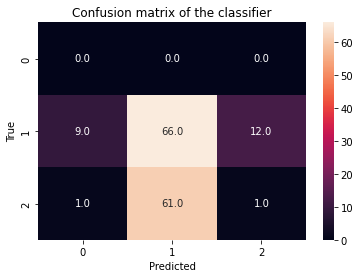

The accuracy of DT is 44.666667%
Precision/Recall/F1/Support:
(0.19886937209771852, 0.25816456850939606, 0.2143794064600754, None)
Participant: 10 
Total samples available: 2144            
Number of training samples: 1993 
Number of testing samples: 150 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


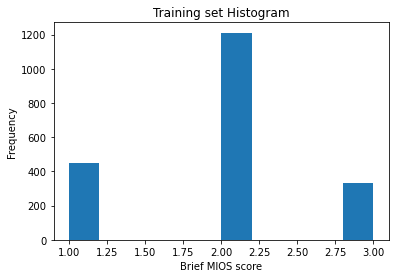

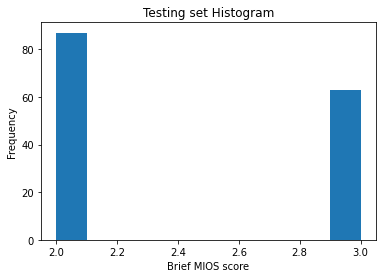

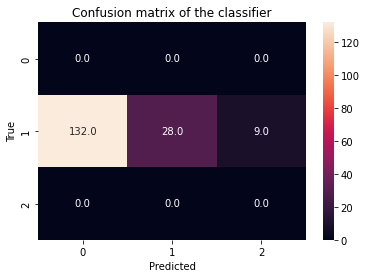

The accuracy of DT is 16.568047%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.05522682445759369, 0.09475465313028765, None)
Participant: 11 
Total samples available: 2144            
Number of training samples: 1974 
Number of testing samples: 169 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


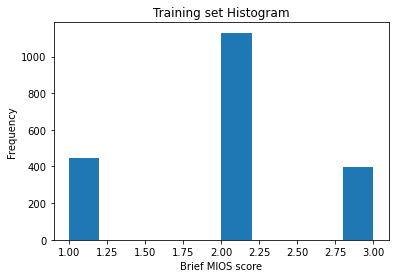

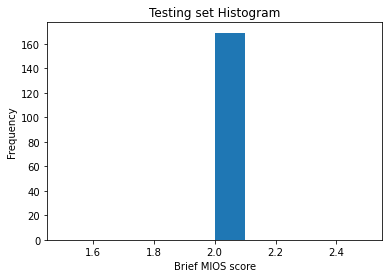

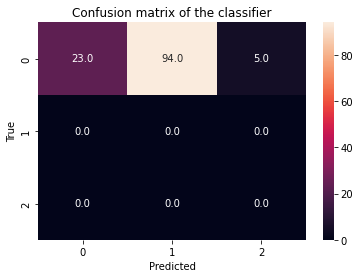

The accuracy of DT is 18.852459%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.06284153005464481, 0.10574712643678162, None)
Participant: 12 
Total samples available: 2144            
Number of training samples: 2021 
Number of testing samples: 122 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


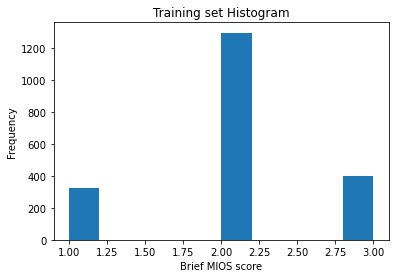

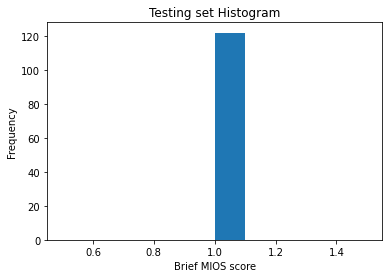

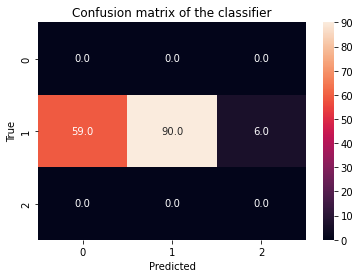

The accuracy of DT is 58.064516%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.19354838709677422, 0.2448979591836735, None)
Participant: 13 
Total samples available: 2144            
Number of training samples: 1988 
Number of testing samples: 155 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


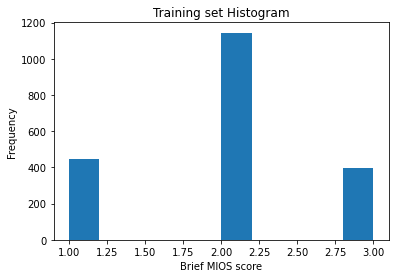

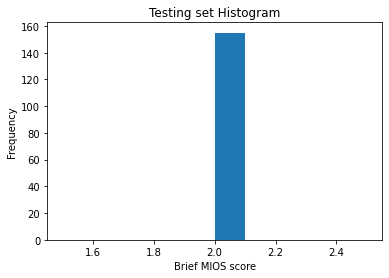

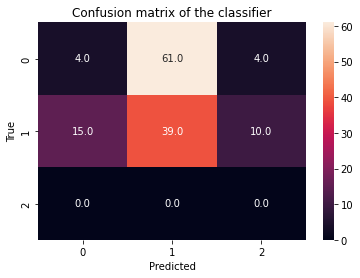

The accuracy of DT is 32.330827%
Precision/Recall/F1/Support:
(0.20017543859649123, 0.22244867149758454, 0.18883961566888396, None)
Participant: 14 
Total samples available: 2144            
Number of training samples: 2010 
Number of testing samples: 133 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


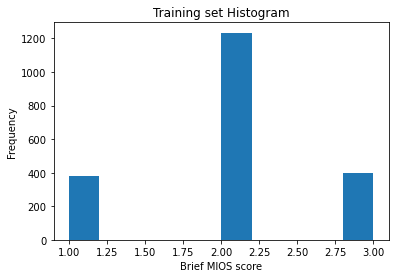

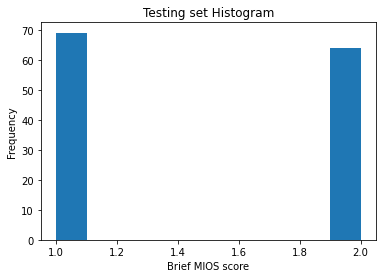

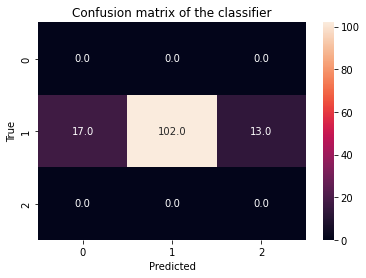

The accuracy of DT is 77.272727%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.25757575757575757, 0.2905982905982906, None)
Participant: 15 
Total samples available: 2144            
Number of training samples: 2012 
Number of testing samples: 132 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


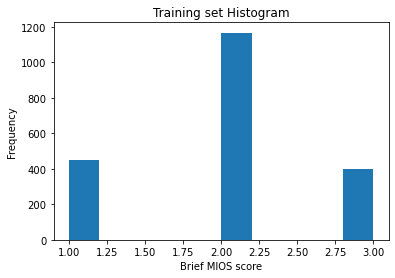

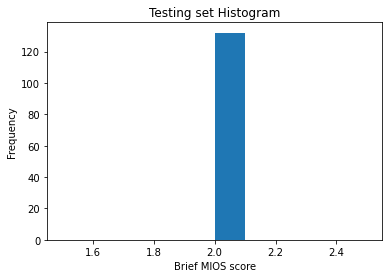

In [153]:
acc = np.zeros (n_participants)

for par_num in range (0, n_participants):

    start_train = n_samples_per_par [par_num]
    end_train = n_samples_per_par [par_num+1]

    X_train = np.vstack ((X[:start_train], X[end_train+1:]))
    y_train = np.hstack ((Y[:start_train], Y[end_train+1:]))

    X_test = X[start_train:end_train]
    y_test = Y[start_train:end_train]

    dt_acc = DT_prediction (X_train, y_train, X_test,y_test)
    histo_labels (par_num+1,ft_stacked,y_train,y_test)
    
    acc[par_num] = dt_acc

In [154]:
print ('Decision Tree: The average LOSO accuracy is %.2f +- %.2f' %(np.mean (acc)*100, np.std (acc)*100))

Decision Tree: The average LOSO accuracy is 36.89 +- 18.46


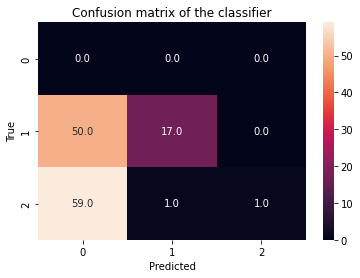

The accuracy of SVM is 14.062500%
Precision/Recall/F1/Support:
(0.6481481481481481, 0.09004159530217765, 0.14408602150537633, None)
Participant: 1 
Total samples available: 2144            
Number of training samples: 2015 
Number of testing samples: 128 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


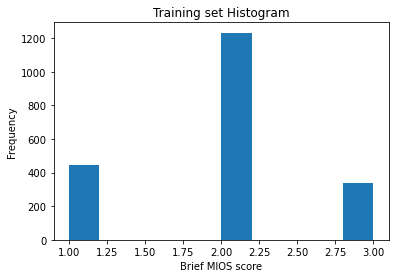

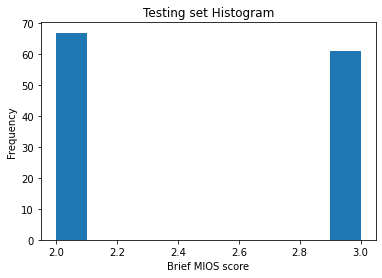

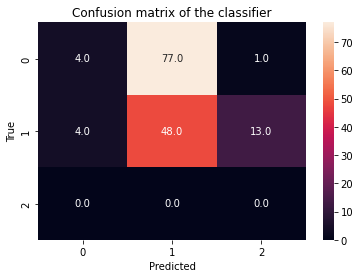

The accuracy of SVM is 35.374150%
Precision/Recall/F1/Support:
(0.2946666666666667, 0.2624140087554722, 0.19805068226120862, None)
Participant: 2 
Total samples available: 2144            
Number of training samples: 1996 
Number of testing samples: 147 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


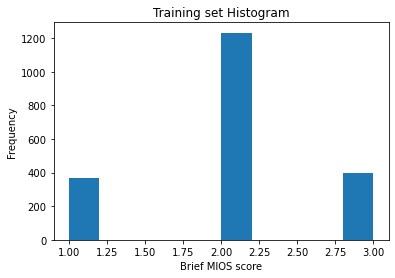

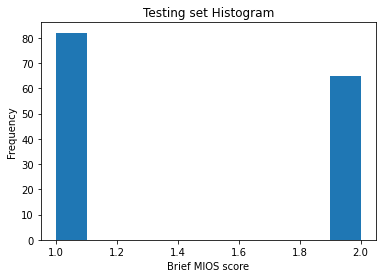

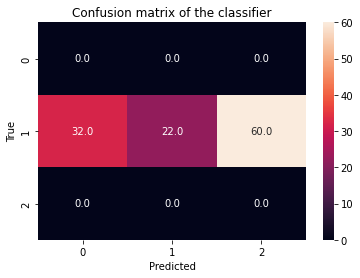

The accuracy of SVM is 19.298246%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.06432748538011696, 0.10784313725490197, None)
Participant: 3 
Total samples available: 2144            
Number of training samples: 2029 
Number of testing samples: 114 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


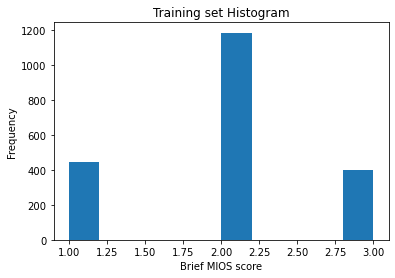

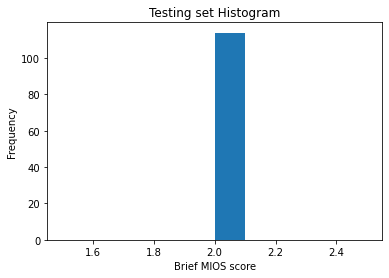

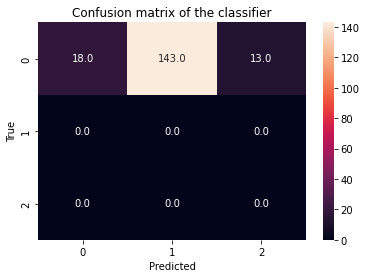

The accuracy of SVM is 10.344828%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.034482758620689655, 0.0625, None)
Participant: 4 
Total samples available: 2144            
Number of training samples: 1969 
Number of testing samples: 174 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


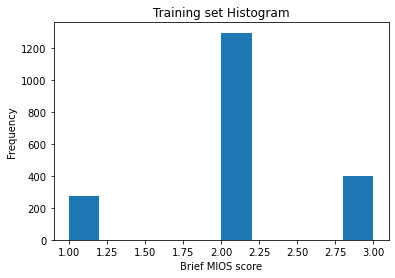

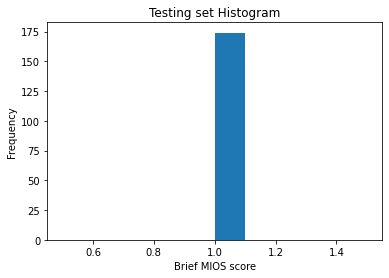

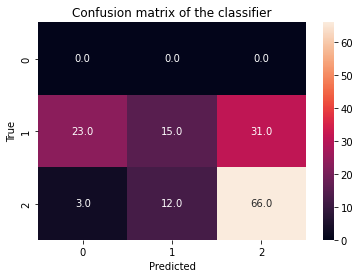

The accuracy of SVM is 54.000000%
Precision/Recall/F1/Support:
(0.4119893088965254, 0.34406870638754694, 0.35135767790262173, None)
Participant: 5 
Total samples available: 2144            
Number of training samples: 1993 
Number of testing samples: 150 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


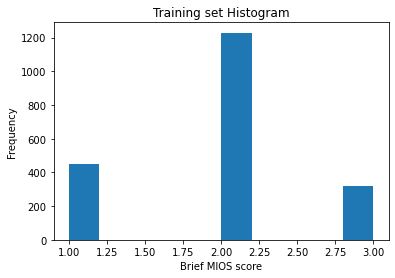

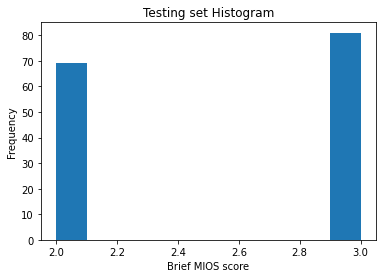

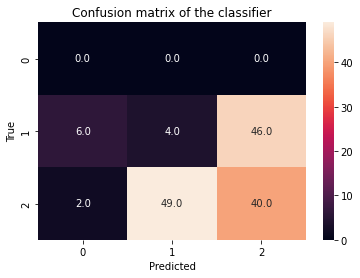

The accuracy of SVM is 29.931973%
Precision/Recall/F1/Support:
(0.18019599239432502, 0.1703296703296703, 0.17512396551426254, None)
Participant: 6 
Total samples available: 2144            
Number of training samples: 1996 
Number of testing samples: 147 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


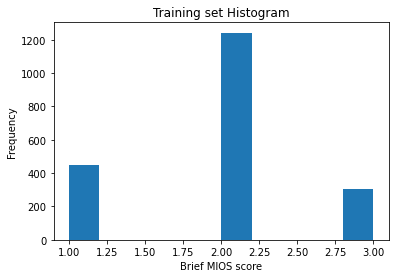

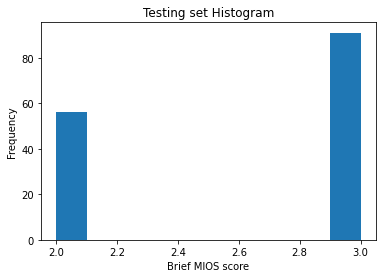

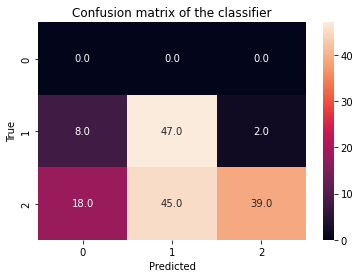

The accuracy of SVM is 54.088050%
Precision/Recall/F1/Support:
(0.48736302580417107, 0.4023047815617475, 0.39210900955867395, None)
Participant: 7 
Total samples available: 2144            
Number of training samples: 1984 
Number of testing samples: 159 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


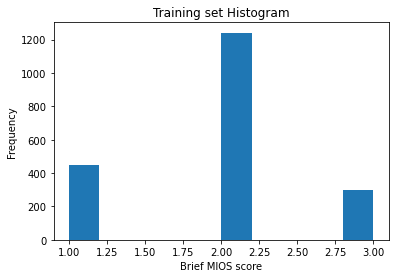

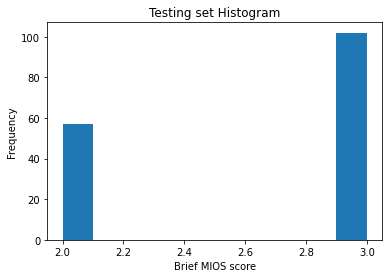

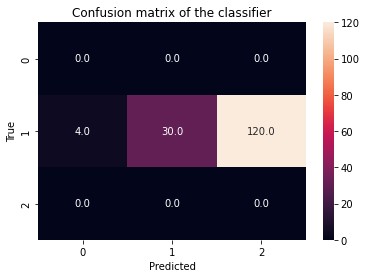

The accuracy of SVM is 19.480519%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.06493506493506494, 0.10869565217391304, None)
Participant: 8 
Total samples available: 2144            
Number of training samples: 1989 
Number of testing samples: 154 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


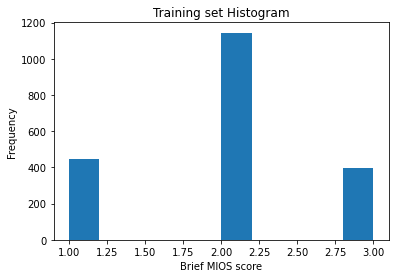

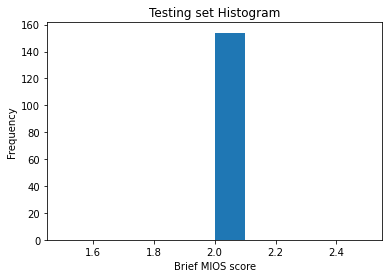

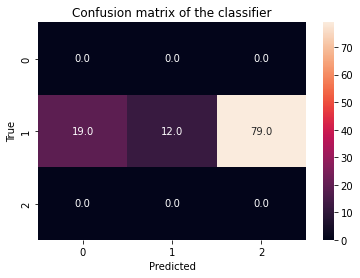

The accuracy of SVM is 10.909091%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.03636363636363636, 0.06557377049180328, None)
Participant: 9 
Total samples available: 2144            
Number of training samples: 2033 
Number of testing samples: 110 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


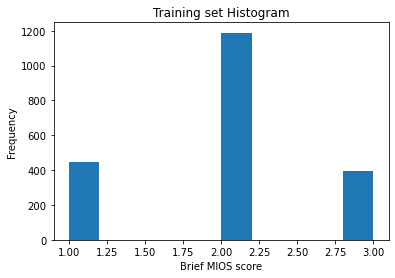

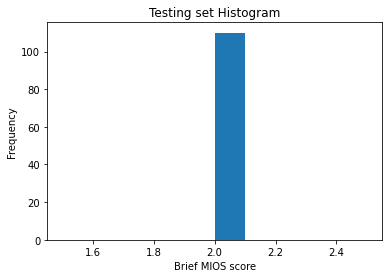

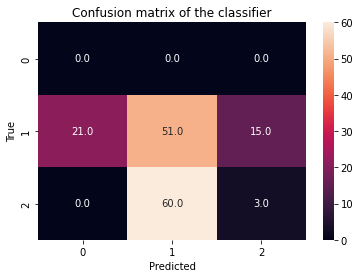

The accuracy of SVM is 36.000000%
Precision/Recall/F1/Support:
(0.20870870870870872, 0.21127531472359054, 0.19640852974186307, None)
Participant: 10 
Total samples available: 2144            
Number of training samples: 1993 
Number of testing samples: 150 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


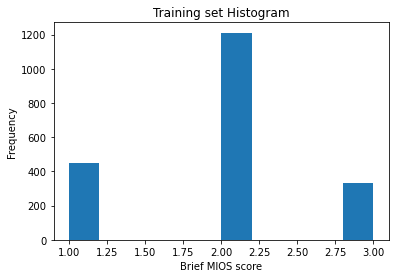

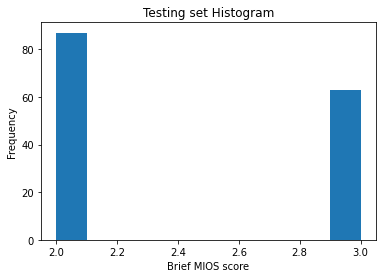

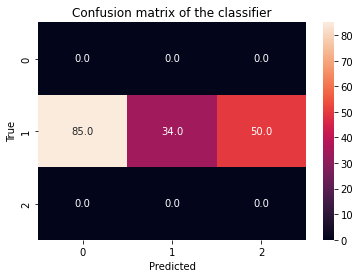

The accuracy of SVM is 20.118343%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.0670611439842209, 0.11165845648604271, None)
Participant: 11 
Total samples available: 2144            
Number of training samples: 1974 
Number of testing samples: 169 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


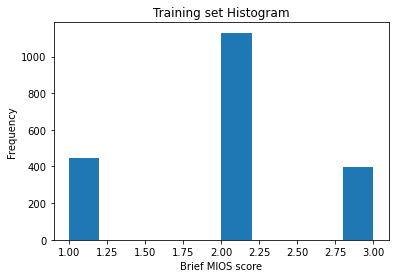

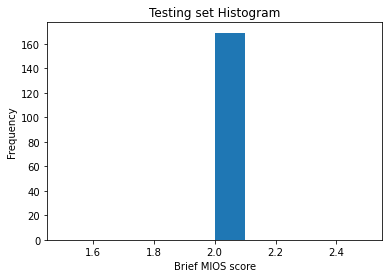

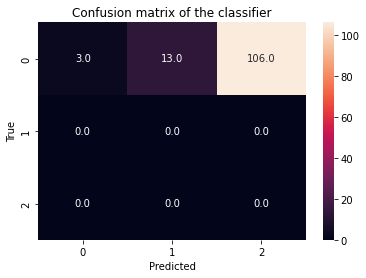

The accuracy of SVM is 2.459016%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.00819672131147541, 0.016, None)
Participant: 12 
Total samples available: 2144            
Number of training samples: 2021 
Number of testing samples: 122 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


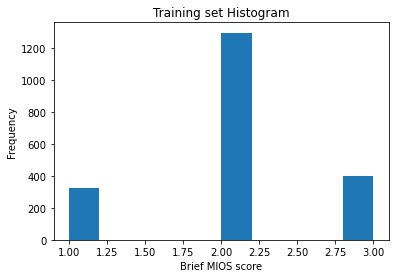

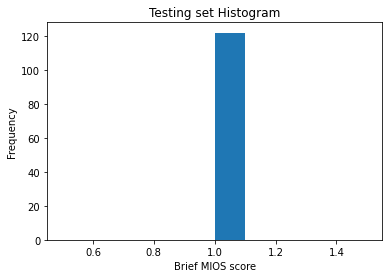

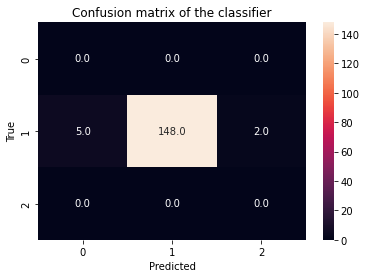

The accuracy of SVM is 95.483871%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.31827956989247314, 0.3256325632563256, None)
Participant: 13 
Total samples available: 2144            
Number of training samples: 1988 
Number of testing samples: 155 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


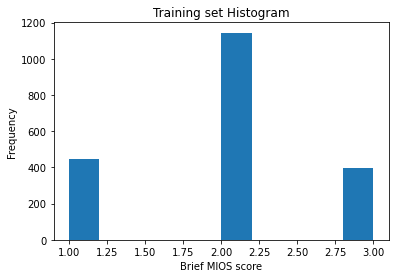

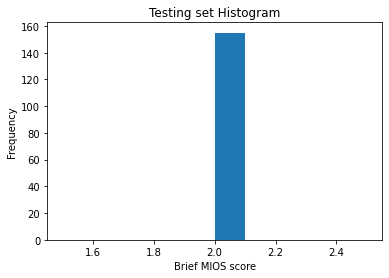

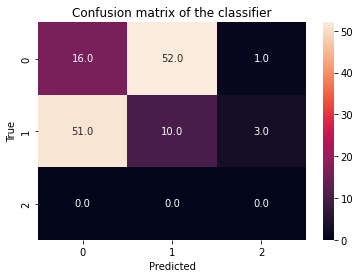

The accuracy of SVM is 19.548872%
Precision/Recall/F1/Support:
(0.1333654309099663, 0.12937801932367152, 0.13134142545907254, None)
Participant: 14 
Total samples available: 2144            
Number of training samples: 2010 
Number of testing samples: 133 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


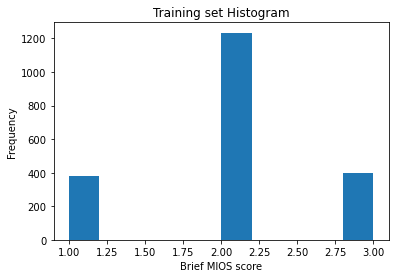

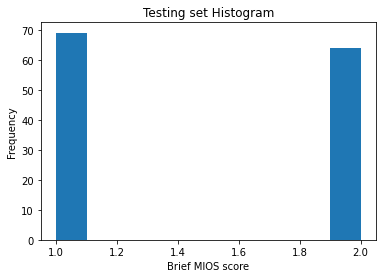

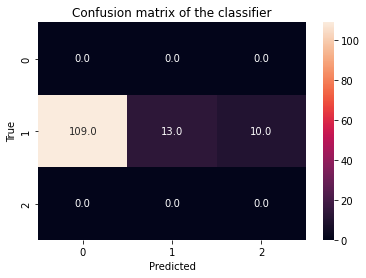

The accuracy of SVM is 9.848485%
Precision/Recall/F1/Support:
(0.3333333333333333, 0.032828282828282825, 0.059770114942528735, None)
Participant: 15 
Total samples available: 2144            
Number of training samples: 2012 
Number of testing samples: 132 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


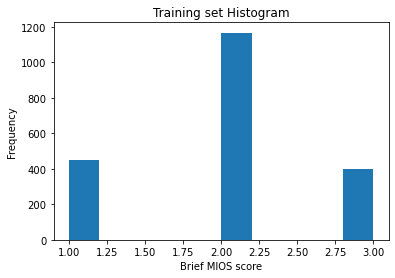

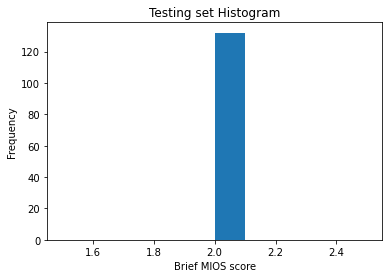

In [155]:
acc = np.zeros (n_participants)

for par_num in range (0, n_participants):

    start_train = n_samples_per_par [par_num]
    end_train = n_samples_per_par [par_num+1]

    X_train = np.vstack ((X[:start_train], X[end_train+1:]))
    y_train = np.hstack ((Y[:start_train], Y[end_train+1:]))

    X_test = X[start_train:end_train]
    y_test = Y[start_train:end_train]

    svm_acc = SVM_prediction (X_train, y_train, X_test,y_test)
    histo_labels (par_num+1,ft_stacked,y_train,y_test)
    
    acc[par_num] = svm_acc

In [156]:
print ('SVM: The average LOSO accuracy is %.2f +- %.2f' %(np.mean (acc)*100, np.std (acc)*100))

SVM: The average LOSO accuracy is 28.73 +- 23.22


# Ablation Test

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

# For ablation test
# MIOS class labels of 0, 1, and 2
y_test_ablation = np.random.randint (0,3,size = len (y_test)) 

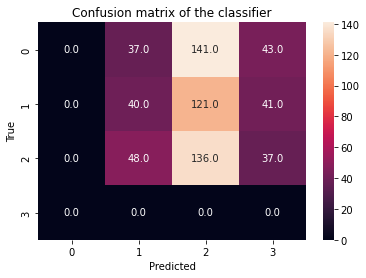

The accuracy of DT is 27.329193%
Precision/Recall/F1/Support:
(0.16542713567839196, 0.20335110434120335, 0.17101668371102646, None)
Participant: 14 
Total samples available: 2144            
Number of training samples: 1500 
Number of testing samples: 644 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


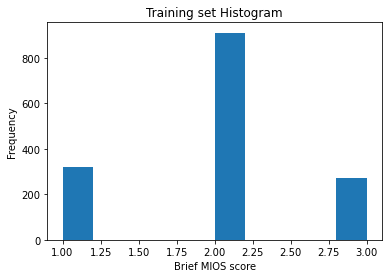

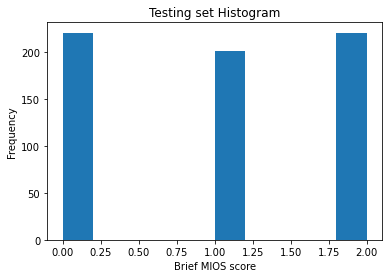

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

DT_prediction (X_train, y_train, X_test,y_test_ablation)

histo_labels (par_num,ft_stacked,y_train,y_test_ablation)

# Removal of top features Ablation

In [159]:
for i in range (0,len(feats[0])):
    print ('Index %d: %s' %(i, feats[0][i]))

Index 0: ['Var local--RI']
Index 1: ['Var local--PPG']
Index 2: ['Var local--ECG']
Index 3: ['Var local--GSR']
Index 4: ['Var local--ECG\\_PR']
Index 5: ['Var local--ECG\\_RR']
Index 6: ['Var local--Respiration\\_Rate']
Index 7: ['Var local--Respiration\\_Rate\\_elevated']
Index 8: ['Mean local--RI']
Index 9: ['Mean local--PPG']
Index 10: ['Mean local--ECG']
Index 11: ['Mean local--GSR']
Index 12: ['Mean local--ECG\\_PR']
Index 13: ['Mean local--ECG\\_RR']
Index 14: ['Mean local--Respiration\\_Rate']
Index 15: ['Mean local--Respiration\\_Rate\\_elevated']
Index 16: ['RMMSD']
Index 17: ['LF']
Index 18: ['HF']
Index 19: ['VLF']
Index 20: ['HF/LF']


## Remove top features 

- Mean - RI
- Mean - GSR
- Mean - Variance PR 
- Mean - ECG RR Interval

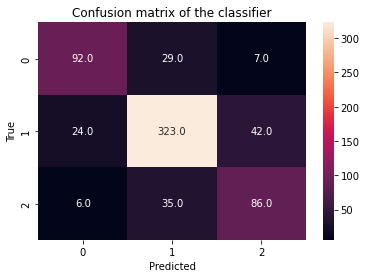

The accuracy of DT is 77.795031%
Precision/Recall/F1/Support:
(0.7419202402300634, 0.7420831815206904, 0.7416542588074814, None)
Participant: 14 
Total samples available: 2144            
Number of training samples: 1500 
Number of testing samples: 644 



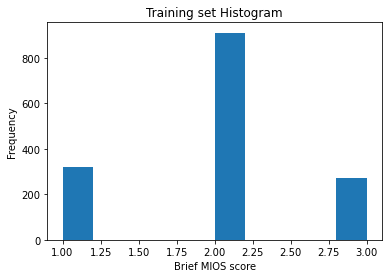

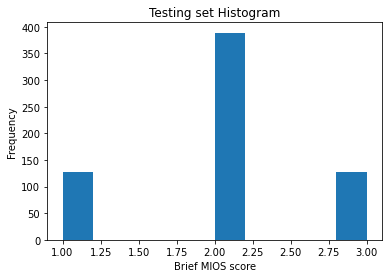

In [160]:
X_reduced = np.delete(X, [8,11,13,4],1)
Y_reduced = Y

X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y_reduced, test_size=0.3, shuffle=True, random_state=60)

DT_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

# Weighted testing

In [161]:
# Cluster 1: 447 Cluster 2: 1299 Cluster 3: 398
weights = {1:1797, 2:845, 3:1746}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

## SVM 

In [162]:
clf = svm.SVC(gamma='scale', class_weight=weights)
clf.fit(X_train, y_train) 
y_pred = clf.predict (X_test)
acc = accuracy_score(y_test, y_pred)
print (acc)


0.8742236024844721


In [163]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8467948676535239, 0.8565293036354067, 0.8511575311335333, None)

In [164]:
clf = SVC(gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train) 
y_pred = clf.predict (X_test)
acc = accuracy_score(y_test, y_pred)
print (acc)


0.6816770186335404


## DT

In [165]:
clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.8322981366459627


In [166]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8011691815207654, 0.8037099952600718, 0.8024219640969719, None)

In [167]:
clf = DecisionTreeClassifier(class_weight=weights, ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.8307453416149069


# Downsampling class 2

In [168]:
# Cluster 1: 447 Cluster 2: 1299 Cluster 3: 398

In [169]:
X_c1 = X[Y==1][0:398]
X_c2 = X[Y==2][0:398]
X_c3 = X[Y==3][0:398]
Y_c1 = Y[Y==1][0:398]
Y_c2 = Y[Y==2][0:398]
Y_c3 = Y[Y==3][0:398]


In [170]:
X_downsample = np.vstack((X_c1,X_c2,X_c3))
Y_downsample = np.hstack((Y_c1,Y_c2,Y_c3))

Participant: 14 
Total samples available: 2144            
Number of training samples: 835 
Number of testing samples: 359 



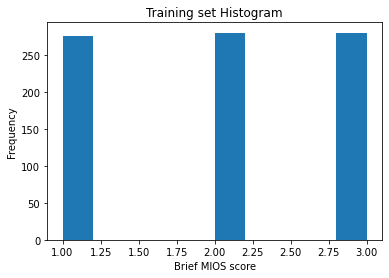

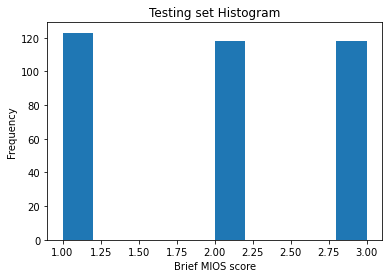

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_downsample, Y_downsample, test_size=0.3, shuffle=True, random_state=60)

histo_labels (par_num,ft_stacked,y_train,y_test)

In [172]:
clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.7855153203342619


In [173]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7811219673369205, 0.7836341922741261, 0.781437908496732, None)

In [174]:
clf = SVC(gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train) 
y_pred = clf.predict (X_test)
acc = accuracy_score(y_test, y_pred)
print (acc)


0.7075208913649025


In [175]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7272327012558163, 0.7047678103899683, 0.7011322980133573, None)

# SMOTE

In [176]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, Y)

In [177]:
# define model
from sklearn.model_selection import RepeatedStratifiedKFold
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=60)

clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.935042735042735


In [179]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9341099538299341, 0.9331317395785336, 0.9334917147622227, None)

In [180]:
clf = SVC(gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train) 
y_pred = clf.predict (X_test)
acc = accuracy_score(y_test, y_pred)
print (acc)


0.7769230769230769


In [181]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7807356924672367, 0.7702840204272988, 0.7691599312523225, None)

In [182]:
print ('Length of Cluster 1: %d Cluster 2: %d Cluster 3: %d' %(sum(y==1),sum(y==2),sum(y==3)))

Length of Cluster 1: 1299 Cluster 2: 1299 Cluster 3: 1299
